<a href="https://colab.research.google.com/github/pravda27/hacks_ai/blob/main/Altay_students_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Загрузим нужные библиотеки

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import f1_score
from google.colab.data_table import DataTable
DataTable.max_columns = 80
%matplotlib inline

In [ ]:
from google.colab import files


uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving sample_submission1.csv to sample_submission1.csv
Saving test_dataset_test (1).csv to test_dataset_test (1).csv
Saving train_dataset_train.csv to train_dataset_train.csv
User uploaded file "sample_submission1.csv" with length 46893 bytes
User uploaded file "test_dataset_test (1).csv" with length 2050262 bytes
User uploaded file "train_dataset_train.csv" with length 4186716 bytes


In [ ]:
df = pd.read_csv('train_dataset_train.csv')

## Рассмотрим датасет по ближе

In [ ]:
df.head(3)

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,...,Общежитие,Наличие_Матери,Наличие_Отца,Страна_Родители,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Статус
0,72716,16019,2015,Жен,ОО,Английский язык,1998-02-08 00:00:00.000,"МБОУ ""СОШ №59""","Алтайский край, Барнаул г",2014.0,...,0.0,0,0.0,Россия,0.0,0.0,0.0,41.0,4.294,3
1,63306,14895,2010,Муж,ЦН,NaN,1992-04-18 00:00:00.000,NaN,NaN,NaN,...,0.0,1,1.0,Россия,0.0,0.0,0.0,28.0,67.000,4
2,82469,20103,2017,Жен,ДН,Английский язык,1999-03-21 00:00:00.000,МБОУ Алтайская СОШ №5,"Алтайский край, Алтайский р-н, Алтайское с",2017.0,...,0.0,1,1.0,Россия,0.0,0.0,0.0,41.0,4.133,4


In [ ]:
df.shape

(13584, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13584 entries, 0 to 13583
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                13584 non-null  int64  
 1   Код_группы        13584 non-null  int64  
 2   Год_Поступления   13584 non-null  int64  
 3   Пол               13577 non-null  object 
 4   Основания         13584 non-null  object 
 5   Изучаемый_Язык    12758 non-null  object 
 6   Дата_Рождения     13584 non-null  object 
 7   Уч_Заведение      12351 non-null  object 
 8   Где_Находится_УЗ  12203 non-null  object 
 9   Год_Окончания_УЗ  12284 non-null  float64
 10  Пособие           12576 non-null  float64
 11  Страна_ПП         13237 non-null  object 
 12  Регион_ПП         12966 non-null  object 
 13  Город_ПП          13141 non-null  object 
 14  Общежитие         13498 non-null  float64
 15  Наличие_Матери    13584 non-null  int64  
 16  Наличие_Отца      13584 non-null  float6

In [ ]:
df.duplicated().sum()

0

Заменим все пропуски в данных

In [ ]:
df = df.fillna(0)

Пострим на распределение данных

Text(0.5, 1.0, 'Распределение предсказываемой величены')

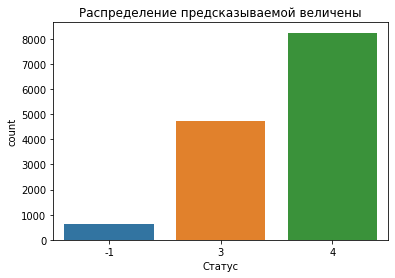

In [ ]:
sns.countplot(x = "Статус" , data  = df).set_title('Распределение предсказываемой величены')

Text(0.5, 1.0, 'Распределение года поступления')

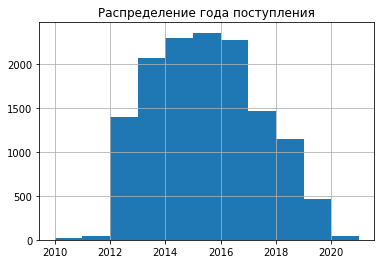

In [ ]:
df["Год_Поступления"].hist(bins = 11, range = [2010, 2021]).set_title('Распределение года поступления')

Взглянем на несколько величин сразу

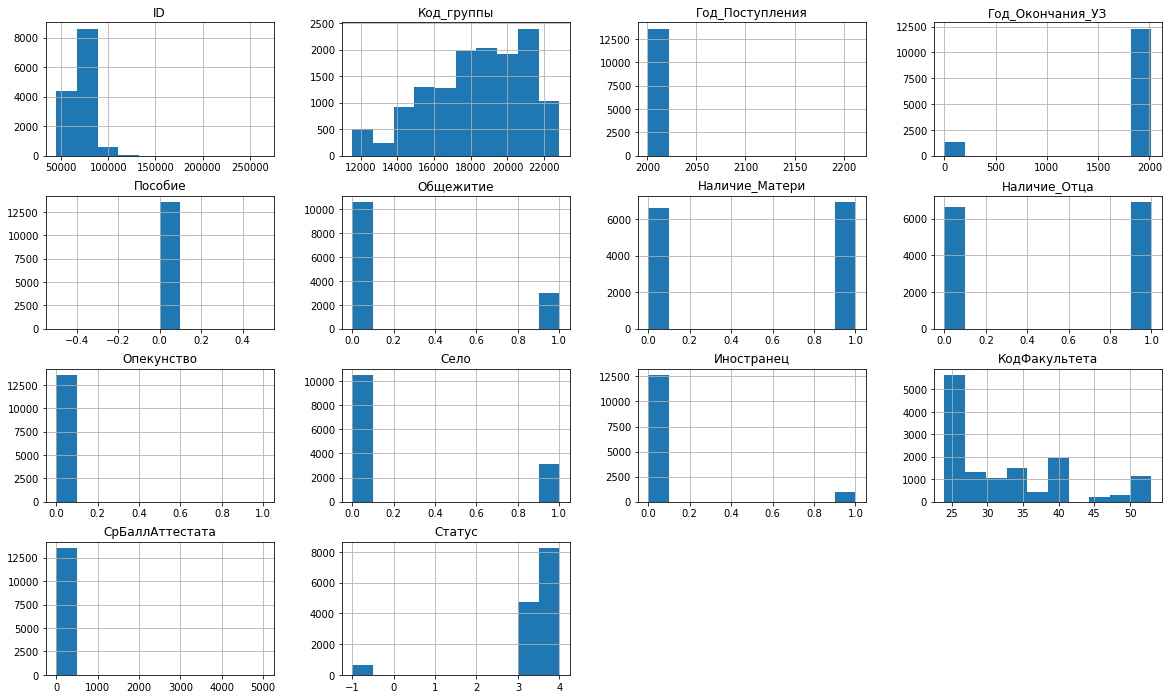

In [ ]:
_ = df[df.columns].hist(figsize=(20,12))

Обратим внимание на часть столбцов с постоянными значениями

In [ ]:
df["Пособие"].value_counts()

0.0    13584
Name: Пособие, dtype: int64

In [ ]:
#df["Пособие"].value_counts()

In [ ]:
df["Опекунство"].value_counts()

0.0    13578
1.0        6
Name: Опекунство, dtype: int64

0

In [ ]:
df.columns.values

array(['ID', 'Код_группы', 'Год_Поступления', 'Пол', 'Основания',
       'Изучаемый_Язык', 'Дата_Рождения', 'Уч_Заведение',
       'Где_Находится_УЗ', 'Год_Окончания_УЗ', 'Пособие', 'Страна_ПП',
       'Регион_ПП', 'Город_ПП', 'Общежитие', 'Наличие_Матери',
       'Наличие_Отца', 'Страна_Родители', 'Опекунство', 'Село',
       'Иностранец', 'КодФакультета', 'СрБаллАттестата', 'Статус'],
      dtype=object)

Зададим примерный возраст поступившего

In [ ]:
df['Дата_Рождения'] = pd.to_datetime(df['Дата_Рождения'])
df['Год_Рождения'] = df['Дата_Рождения'].dt.year
df['возраст_пост'] = df['Год_Поступления'] - df['Год_Рождения']

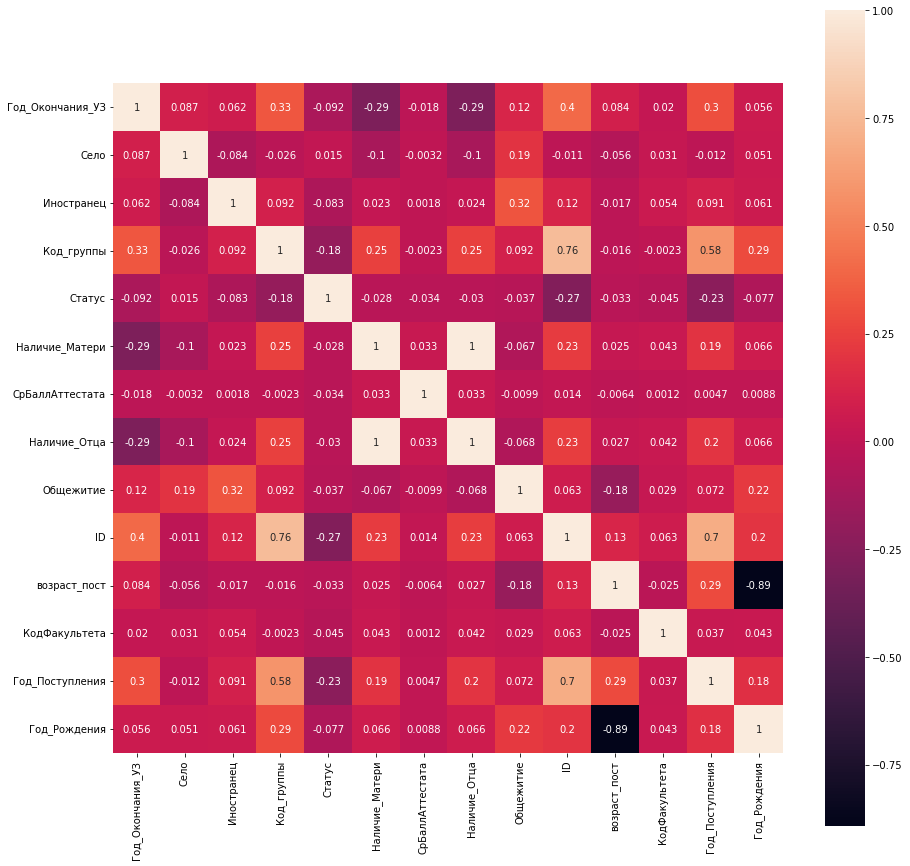

In [ ]:
plt.rcParams['figure.figsize']=(15,15)


df_corr = list(set(df.columns.values) - set(['Опекунство','Пособие']))
g = sns.heatmap(df[df_corr].corr(), square = True, annot=True)

## Работа над текстовыми переменными

In [ ]:
df.dtypes[df.dtypes == "object"].index.values

array(['Пол', 'Основания', 'Изучаемый_Язык', 'Уч_Заведение',
       'Где_Находится_УЗ', 'Страна_ПП', 'Регион_ПП', 'Город_ПП',
       'Страна_Родители'], dtype=object)

Найдем русских и иностранцев по ПП

In [ ]:
df['Страна_ПП'] = df['Страна_ПП'].apply(lambda x: 'Россия' if x=='Россия' else 'зарубеж')

Избавимся от некорректного пола

In [ ]:
df["Пол"].value_counts()

Жен    8133
Муж    5443
0         7
муж       1
Name: Пол, dtype: int64

In [ ]:
#df = df.query('Пол in ("Муж","Жен")').reset_index(drop=True)
df["Пол"] = df["Пол"].replace( {'муж':'Муж',
                                 0 :'Муж',
                                'жен' : 'Жен'}
                             )    

Почистим категории в Языках

In [ ]:
df["Изучаемый_Язык"].value_counts()

Английский язык                  10450
Немецкий язык                     2219
0                                  826
Французский язык                    54
Русский язык                        11
Иностранный язык (Английский)       10
Англиийский                         10
Иностранный язык (Немецкий)          4
Name: Изучаемый_Язык, dtype: int64

In [ ]:
df["Изучаемый_Язык"] = df["Изучаемый_Язык"].replace( {'Иностранный язык (Английский)':'Английский язык',
                               'Англиийский' :'Английский язык',
                               'Иностранный язык (Немецкий)' : 'Немецкий язык'}
                             )                               

In [ ]:
df["Основания"].value_counts()

ОО    5084
СН    4558
БН    1882
ДН    1853
ЦН     207
Name: Основания, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=["Пол", "Изучаемый_Язык","Основания","Страна_ПП"], prefix=["Пол", "Язык","ОСН","страна"])

In [ ]:
df.head()

,ID,Код_группы,Год_Поступления,Дата_Рождения,Уч_Заведение,Где_Находится_УЗ,Год_Окончания_УЗ,Пособие,Регион_ПП,Город_ПП,...,Язык_Немецкий язык,Язык_Русский язык,Язык_Французский язык,ОСН_БН,ОСН_ДН,ОСН_ОО,ОСН_СН,ОСН_ЦН,страна_Россия,страна_зарубеж
0,72716,16019,2015,1998-02-08,"МБОУ ""СОШ №59""","Алтайский край, Барнаул г",2014.0,0.0,Алтайский край,Барнаул г,...,0,0,0,0,0,1,0,0,1,0
1,63306,14895,2010,1992-04-18,0,0,0.0,0.0,Алтайский край,Барнаул г,...,0,0,0,0,0,0,0,1,1,0
2,82469,20103,2017,1999-03-21,МБОУ Алтайская СОШ №5,"Алтайский край, Алтайский р-н, Алтайское с",2017.0,0.0,Алтайский край,Алтайское с,...,0,0,0,0,1,0,0,0,1,0
3,81661,19838,2017,1994-12-08,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, г. Барнаул",2017.0,0.0,Алтайский край,г. Барнаул,...,0,0,0,1,0,0,0,0,1,0
4,81509,19803,2017,1995-06-28,ФГБОУ ВО Алтайский государственный университет,"Алтайский край, г. Барнаул",2017.0,0.0,Алтайский край,г. Барнаул,...,0,0,0,1,0,0,0,0,1,0


Поместим все столбцы object в массив, для их дальнейшего удаления

In [ ]:
mass_object = ('Дата_Рождения',
       'Уч_Заведение', 'Где_Находится_УЗ',  'Регион_ПП',
       'Город_ПП', 'Страна_Родители')
mass_object = np.append(mass_object, "Статус")

In [ ]:
mass_object

array(['Дата_Рождения', 'Уч_Заведение', 'Где_Находится_УЗ', 'Регион_ПП',
       'Город_ПП', 'Страна_Родители', 'Статус'], dtype='<U16')

## Получение выборки для трейна и теста

In [ ]:
X = df.drop(mass_object, axis = 1)
y = df[["Статус"]]

In [ ]:
X.head()

,ID,Код_группы,Год_Поступления,Год_Окончания_УЗ,Пособие,Общежитие,Наличие_Матери,Наличие_Отца,Опекунство,Село,...,Язык_Немецкий язык,Язык_Русский язык,Язык_Французский язык,ОСН_БН,ОСН_ДН,ОСН_ОО,ОСН_СН,ОСН_ЦН,страна_Россия,страна_зарубеж
0,72716,16019,2015,2014.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
1,63306,14895,2010,0.0,0.0,0.0,1,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,82469,20103,2017,2017.0,0.0,0.0,1,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,81661,19838,2017,2017.0,0.0,0.0,1,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,81509,19803,2017,2017.0,0.0,0.0,1,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)

## Обучение модели Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1 =  RandomForestClassifier(n_estimators=150,
                                 random_state=5)
model1.fit(X_train, y_train) 
y_pred = model1.predict(X_test) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
#pd.crosstab(y_test, y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print(model1.score(X_test,y_test))

              precision    recall  f1-score   support

          -1       0.56      0.31      0.40        86
           3       0.87      0.80      0.83       704
           4       0.90      0.96      0.93      1248

    accuracy                           0.88      2038
   macro avg       0.78      0.69      0.72      2038
weighted avg       0.87      0.88      0.87      2038

0.879784102060844


## Обучение модели Gradient Boosting

In [ ]:
lr_list = [1]  #0.5, 0.75, 1

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=2, max_depth=4, random_state=5)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate:  1
Accuracy score (training): 0.931
Accuracy score (validation): 0.886


In [ ]:
#pd.crosstab(y_test, y_pred)
from sklearn.metrics import classification_report
y_pred = gb_clf.predict(X_test) 
print(classification_report(y_test, y_pred))
print(gb_clf.score(X_test,y_test))

              precision    recall  f1-score   support

          -1       0.54      0.43      0.48        86
           3       0.88      0.81      0.84       704
           4       0.91      0.96      0.93      1248

    accuracy                           0.89      2038
   macro avg       0.77      0.73      0.75      2038
weighted avg       0.88      0.89      0.88      2038

0.8861629048086359


## Обучение модели XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(max_depth = 5,  n_estimators = 800)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test) 
score = xgb_clf.score(X_test, y_test)
print(classification_report(y_test, y_pred))
print(xgb_clf.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

          -1       0.60      0.45      0.52        86
           3       0.90      0.83      0.86       704
           4       0.92      0.98      0.95      1248

    accuracy                           0.90      2038
   macro avg       0.81      0.75      0.78      2038
weighted avg       0.90      0.90      0.90      2038

0.9043179587831207


In [ ]:
y_test.head(3)

,Статус
11556,4
2623,4
3392,4


# Cоздание файла с ответом

In [ ]:
df_test = pd.read_csv("test_dataset_test (1).csv")
df_submission = pd.read_csv("sample_submission1.csv")

In [ ]:
df_submission.head(3)

,ID,Статус
0,64996,NaN
1,71837,NaN
2,86587,NaN


Провем те же манипуляции с данными что и на обучении

In [ ]:
df_test['Дата_Рождения'] = pd.to_datetime(df_test['Дата_Рождения'])
df_test['Год_Рождения'] = df_test['Дата_Рождения'].dt.year
df_test['возраст_пост'] = df_test['Год_Поступления'] - df_test['Год_Рождения']

In [ ]:
#mass_object1 = df.dtypes[df.dtypes == "object"].index.values
mass_object = np.array(['Дата_Рождения',
       'Уч_Заведение', 'Где_Находится_УЗ',  'Регион_ПП',
       'Город_ПП', 'Страна_Родители'])
mass_object
df_test = df_test.drop(mass_object, axis = 1)

In [ ]:
df_test = df_test.fillna(0)
df_test.head()

,ID,Код_группы,Год_Поступления,Пол,Основания,Изучаемый_Язык,Год_Окончания_УЗ,Пособие,Страна_ПП,Общежитие,Наличие_Матери,Наличие_Отца,Опекунство,Село,Иностранец,КодФакультета,СрБаллАттестата,Год_Рождения,возраст_пост
0,64996,20608,2014,Жен,ДН,Английский язык,2014.0,0.0,Россия,0.0,0,0.0,0.0,0.0,0.0,40.0,49.0,1995,19
1,71837,20613,2015,Жен,ДН,Немецкий язык,2014.0,0.0,Россия,0.0,0,0.0,0.0,1.0,0.0,26.0,77.0,1995,20
2,86587,21210,2018,Жен,ОО,Английский язык,1997.0,0.0,Россия,0.0,1,1.0,0.0,0.0,0.0,34.0,74.0,1973,45
3,73673,22254,2015,Жен,ОО,Английский язык,2006.0,0.0,Россия,0.0,0,0.0,0.0,0.0,0.0,53.0,57.0,1983,32
4,54709,15040,2012,Жен,ОО,0,0.0,0.0,0,0.0,1,1.0,0.0,0.0,0.0,36.0,55.0,1994,18


In [ ]:
df_test["Пол"] = df_test["Пол"].replace( {'муж':'Муж',
                                 0 :'Муж',
                                'жен' : 'Жен'}
                             ) 
df_test["Изучаемый_Язык"] = df_test["Изучаемый_Язык"].replace( {'Иностранный язык (Английский)':'Английский язык',
                               'Англиийский' :'Английский язык',
                               'Иностранный язык (Немецкий)' : 'Немецкий язык',
                               'Английский, немецкий языки' : 'Английский язык'}
                             ) 
df_test["Основания"] = df_test["Основания"].replace( {'ЛН':'СН'} )   
df_test['Страна_ПП'] = df_test['Страна_ПП'].apply(lambda x: 'Россия' if x=='Россия' else 'зарубеж')

df_test = pd.get_dummies(df_test, columns=["Пол", "Изучаемый_Язык","Основания","Страна_ПП"], prefix=["Пол", "Язык","ОСН","страна"])

df_test.head()

,ID,Код_группы,Год_Поступления,Год_Окончания_УЗ,Пособие,Общежитие,Наличие_Матери,Наличие_Отца,Опекунство,Село,...,Язык_Немецкий язык,Язык_Русский язык,Язык_Французский язык,ОСН_БН,ОСН_ДН,ОСН_ОО,ОСН_СН,ОСН_ЦН,страна_Россия,страна_зарубеж
0,64996,20608,2014,2014.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,71837,20613,2015,2014.0,0.0,0.0,0,0.0,0.0,1.0,...,1,0,0,0,1,0,0,0,1,0
2,86587,21210,2018,1997.0,0.0,0.0,1,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
3,73673,22254,2015,2006.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
4,54709,15040,2012,0.0,0.0,0.0,1,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
df_test_pred = xgb_clf.predict(df_test)

In [ ]:
df_submission["Статус"] = df_test_pred
df_submission.head(4)

,ID,Статус
0,64996,4
1,71837,4
2,86587,4
3,73673,-1


In [ ]:
df_submission.to_csv('submission.csv', index = False)
from google.colab import files
files.download("submission.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>